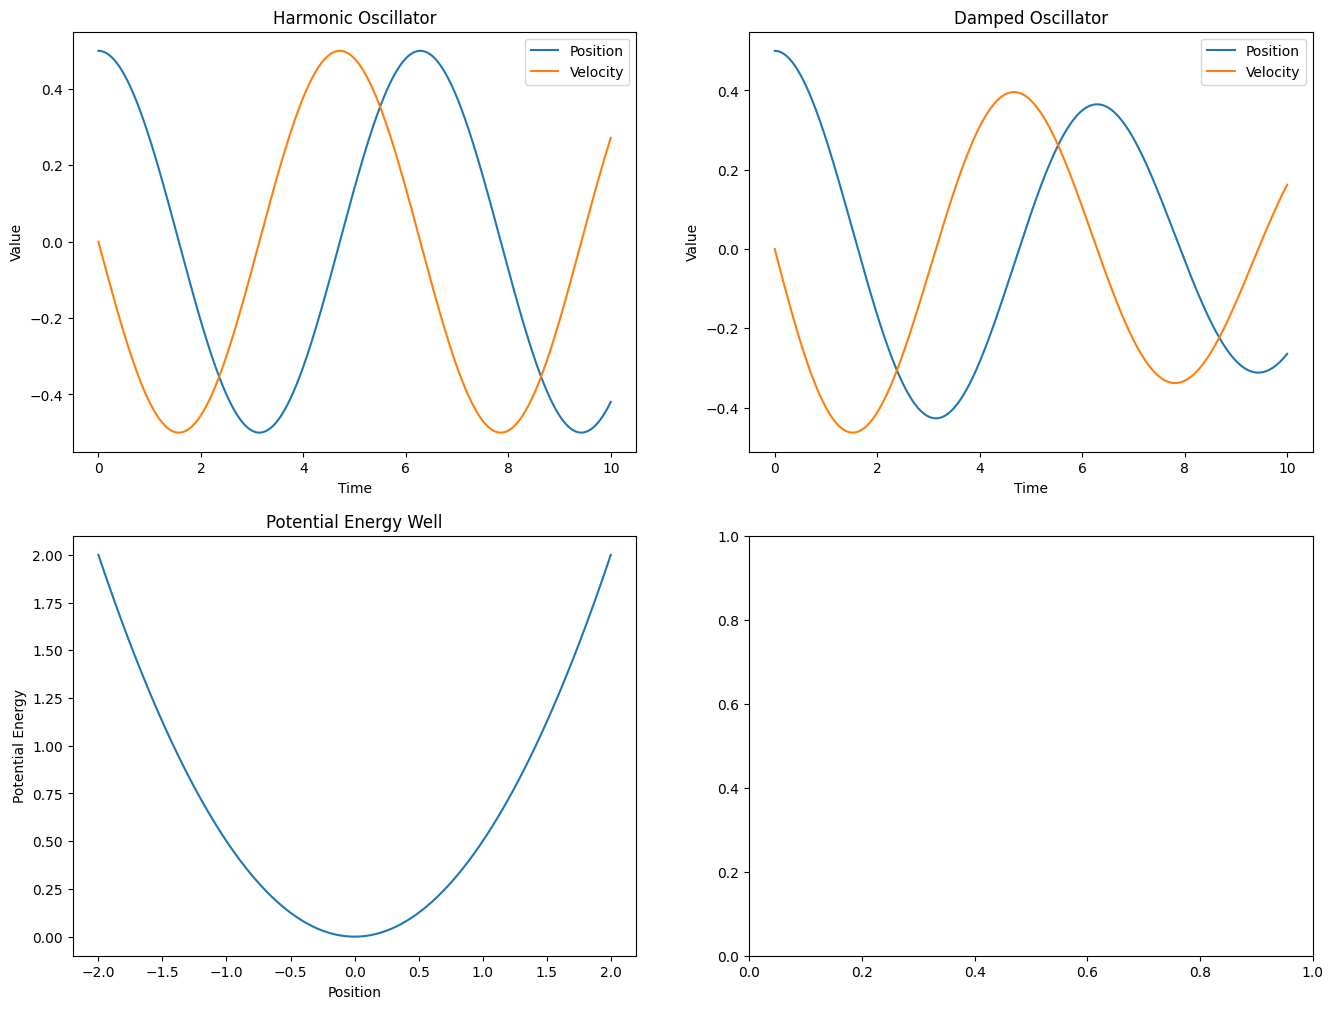

ValueError: x and y must have same first dimension, but have shapes (25,) and (250,)

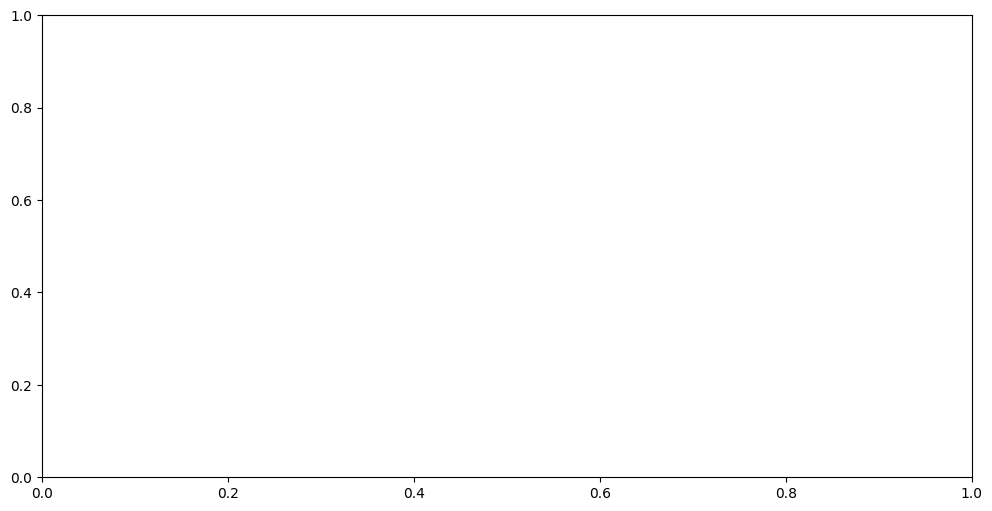

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from scipy.stats import multivariate_normal
from scipy.fft import fft, fftfreq

# Constants
STOP_LOSS_VALUES = np.linspace(0.01, 0.30, 10)  # Example range
TAKE_PROFIT_VALUES = np.linspace(0.01, 0.50, 10)  # Example range
GOLDEN_RATIO = (1 + np.sqrt(5)) / 2

# Harmonic Oscillator Simulation
def harmonic_oscillator(y, t, k, m):
    x, v = y
    dxdt = v
    dvdt = - (k/m) * x
    return [dxdt, dvdt]

# Parameters for the oscillator
k = 1.0  # Spring constant
m = 1.0  # Mass
initial_conditions = [0.5, 0.0]  # Initial position and velocity
time = np.linspace(0, 10, 500)  # Time vector

# Solve the differential equation
solution = odeint(harmonic_oscillator, initial_conditions, time, args=(k, m))
position = solution[:, 0]
velocity = solution[:, 1]

# Damped Oscillator Simulation
def damped_oscillator(y, t, k, m, b):
    x, v = y
    dxdt = v
    dvdt = - (k/m) * x - (b/m) * v
    return [dxdt, dvdt]

# Parameters for the damped oscillator
b = 0.1  # Damping coefficient

# Solve the differential equation
solution_damped = odeint(damped_oscillator, initial_conditions, time, args=(k, m, b))
position_damped = solution_damped[:, 0]
velocity_damped = solution_damped[:, 1]

# Potential Energy Well
def potential_energy(x, k):
    return 0.5 * k * x**2

# Fourier Transform of Position Data
def plot_fourier_transform(data, time):
    N = len(data)
    T = time[1] - time[0]
    yf = fft(data)
    xf = fftfreq(N, T)[:N//20]

    plt.figure(figsize=(12, 6))
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.title('Fourier Transform of Position Data')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

# Plotting Harmonic Oscillator and Damped Oscillator
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Harmonic Oscillator
axs[0, 0].plot(time, position, label='Position')
axs[0, 0].plot(time, velocity, label='Velocity')
axs[0, 0].set_title('Harmonic Oscillator')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Value')
axs[0, 0].legend()

# Damped Oscillator
axs[0, 1].plot(time, position_damped, label='Position')
axs[0, 1].plot(time, velocity_damped, label='Velocity')
axs[0, 1].set_title('Damped Oscillator')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Value')
axs[0, 1].legend()

# Potential Energy Well
x = np.linspace(-2, 2, 500)
pe = potential_energy(x, k)
axs[1, 0].plot(x, pe)
axs[1, 0].set_title('Potential Energy Well')
axs[1, 0].set_xlabel('Position')
axs[1, 0].set_ylabel('Potential Energy')

# Bayesian Posterior Distributions and Fourier Transforms
fig_3d = plt.figure(figsize=(16, 12))
ax = fig_3d.add_subplot(111, projection='3d')

# Create Bayesian posterior distributions
def bayesian_posterior(x, y, mu, sigma):
    return multivariate_normal.pdf(np.column_stack([x, y]), mean=mu, cov=sigma)

# Define means and covariance matrices for Bayesian priors
mean1 = [0.15, 0.25]
cov1 = [[0.01, 0.005], [0.005, 0.01]]
mean2 = [0.20, 0.30]
cov2 = [[0.01, -0.005], [-0.005, 0.01]]

# Compute Bayesian posterior probabilities
X, Y = np.meshgrid(STOP_LOSS_VALUES, TAKE_PROFIT_VALUES)
Z1 = bayesian_posterior(X.flatten(), Y.flatten(), mean1, cov1).reshape(X.shape)
Z2 = bayesian_posterior(X.flatten(), Y.flatten(), mean2, cov2).reshape(X.shape)
intersection = np.minimum(Z1, Z2)

# Plotting Bayesian Posterior Distributions
ax.plot_surface(X, Y, Z1, alpha=0.5, cmap='Blues', edgecolor='none', label='Posterior 1')
ax.plot_surface(X, Y, Z2, alpha=0.5, cmap='Reds', edgecolor='none', label='Posterior 2')
ax.plot_surface(X, Y, intersection, alpha=0.75, cmap='Purples', edgecolor='none', label='Intersection')

ax.set_xlabel('Stop Loss (%)')
ax.set_ylabel('Take Profit (%)')
ax.set_zlabel('Probability Density')
ax.set_title('Bayesian Posterior Distributions and Their Intersection')

plt.show()

# Fourier Transform of Harmonic Oscillator Data
plot_fourier_transform(position, time)
plot_fourier_transform(position_damped, time)
